In [ ]:
!pip3 install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
!pip3 install igraph

In [ ]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.0 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=bc07b55606b259c05f2d4be641e7fbdc20aca14aa5dae543a93e25049cd5eb89
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse import issparse

In [ ]:
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

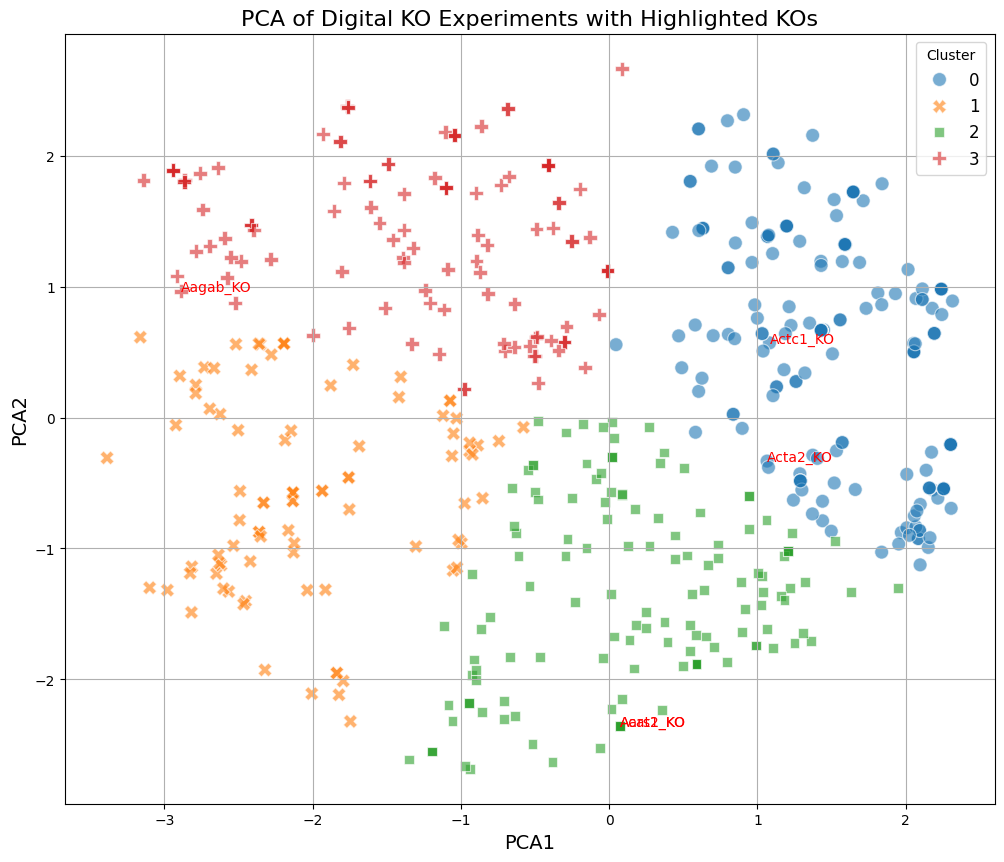

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# Load your KO response table
file_path = '/content/KO_Gene_Response_Table_Updated.csv'
ko_table = pd.read_csv(file_path, index_col=0)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ko_table)

# Create a PCA dataframe
pca_df = pd.DataFrame(
    pca_result,
    columns=["PCA1", "PCA2"],
    index=ko_table.index
)

# Perform K-means clustering
num_clusters = 4  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)
pca_df['Cluster'] = clusters

# Plot PCA with clustering
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="tab10",
    data=pca_df.reset_index(),
    style="Cluster",
    s=100,
    alpha=0.6
)

# Highlight specific KO experiments
highlighted_ko = ['Aagab_KO', 'Aars2_KO', 'Acat1_KO', 'Acta2_KO', 'Actc1_KO']  # Replace with your KO names
for ko in highlighted_ko:
    if ko in pca_df.index:
        plt.text(
            pca_df.loc[ko, "PCA1"],
            pca_df.loc[ko, "PCA2"],
            ko,
            fontsize=10,
            color='red'
        )

plt.title("PCA of Digital KO Experiments with Highlighted KOs", fontsize=16)
plt.xlabel("PCA1", fontsize=14)
plt.ylabel("PCA2", fontsize=14)
plt.legend(title="Cluster", fontsize=12)
plt.grid(True)
plt.show()

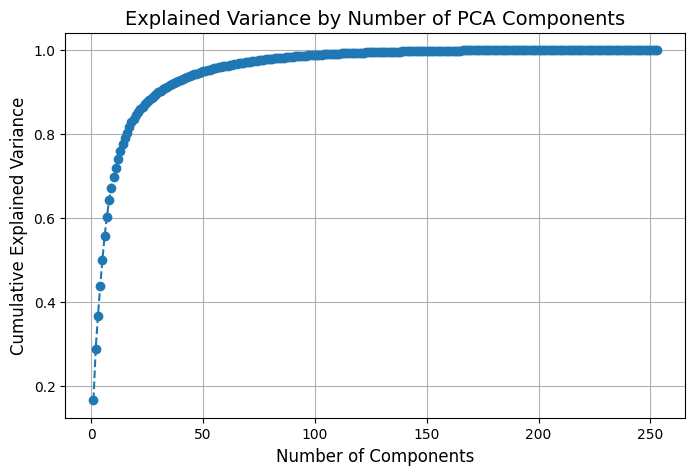

In [ ]:
# Compute PCA for all components
pca_full = PCA()
pca_full_result = pca_full.fit_transform(ko_table)

# Cumulative explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.title("Explained Variance by Number of PCA Components", fontsize=14)
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


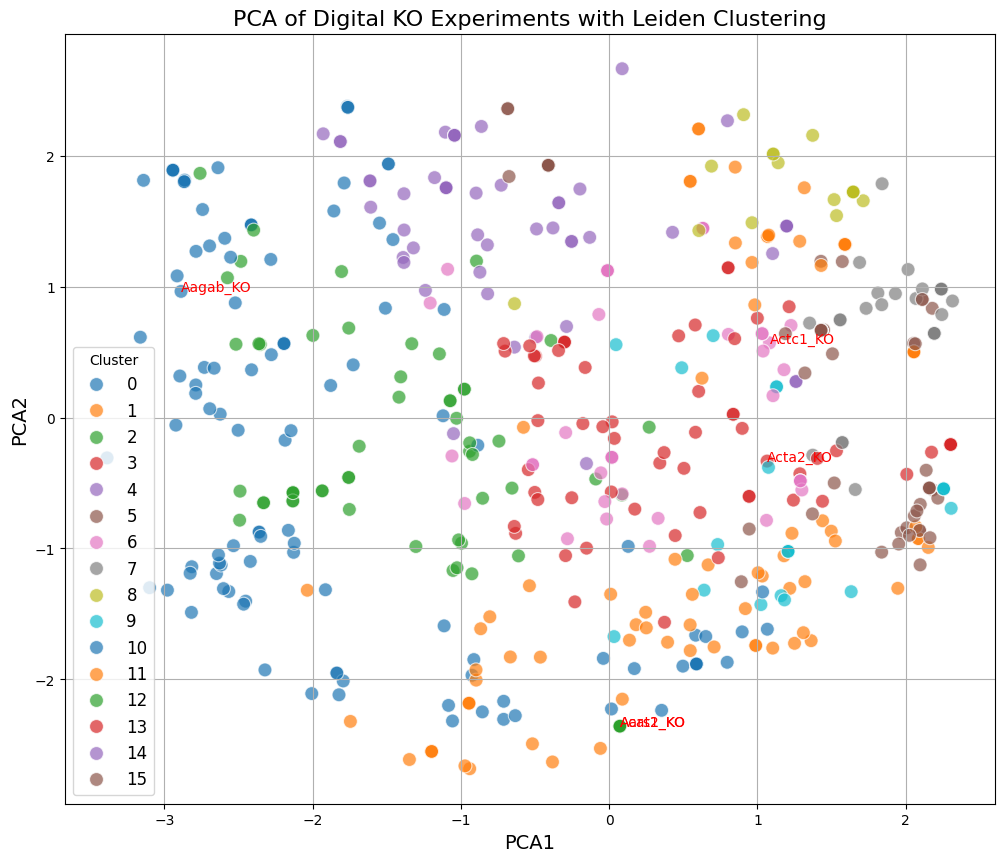

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import scanpy as sc
import numpy as np

# Load your KO response table
file_path = '/content/KO_Gene_Response_Table_Updated.csv'  # Replace with your file path
ko_table = pd.read_csv(file_path, index_col=0)

# Perform PCA (10 components)
pca = PCA(n_components=10)
pca_result = pca.fit_transform(ko_table)

# Prepare AnnData object for Leiden/Louvain clustering
adata = sc.AnnData(X=pca_result)
adata.obs_names = ko_table.index

# Perform graph-based clustering
sc.pp.neighbors(adata, n_neighbors=15, use_rep="X")  # Build the KNN graph
sc.tl.leiden(adata, resolution=0.5)  # Replace 'leiden' with 'louvain' if needed
adata.obs['Cluster'] = adata.obs['leiden']

# Add cluster information to PCA DataFrame for visualization
pca_df = pd.DataFrame(
    pca_result[:, :2],  # Use first 2 components for visualization
    columns=["PCA1", "PCA2"],
    index=ko_table.index
)
pca_df['Cluster'] = adata.obs['Cluster'].astype(int)

# Plot PCA with Leiden clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="tab10",
    data=pca_df.reset_index(),
    s=100,
    alpha=0.7
)

# Highlight specific KO experiments
highlighted_ko = ['Aagab_KO', 'Aars2_KO', 'Acat1_KO', 'Acta2_KO', 'Actc1_KO']  # Replace with your KO names
for ko in highlighted_ko:
    if ko in pca_df.index:
        plt.text(
            pca_df.loc[ko, "PCA1"],
            pca_df.loc[ko, "PCA2"],
            ko,
            fontsize=10,
            color='red'
        )

plt.title("PCA of Digital KO Experiments with Leiden Clustering", fontsize=16)
plt.xlabel("PCA1", fontsize=14)
plt.ylabel("PCA2", fontsize=14)
plt.legend(title="Cluster", fontsize=12)
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


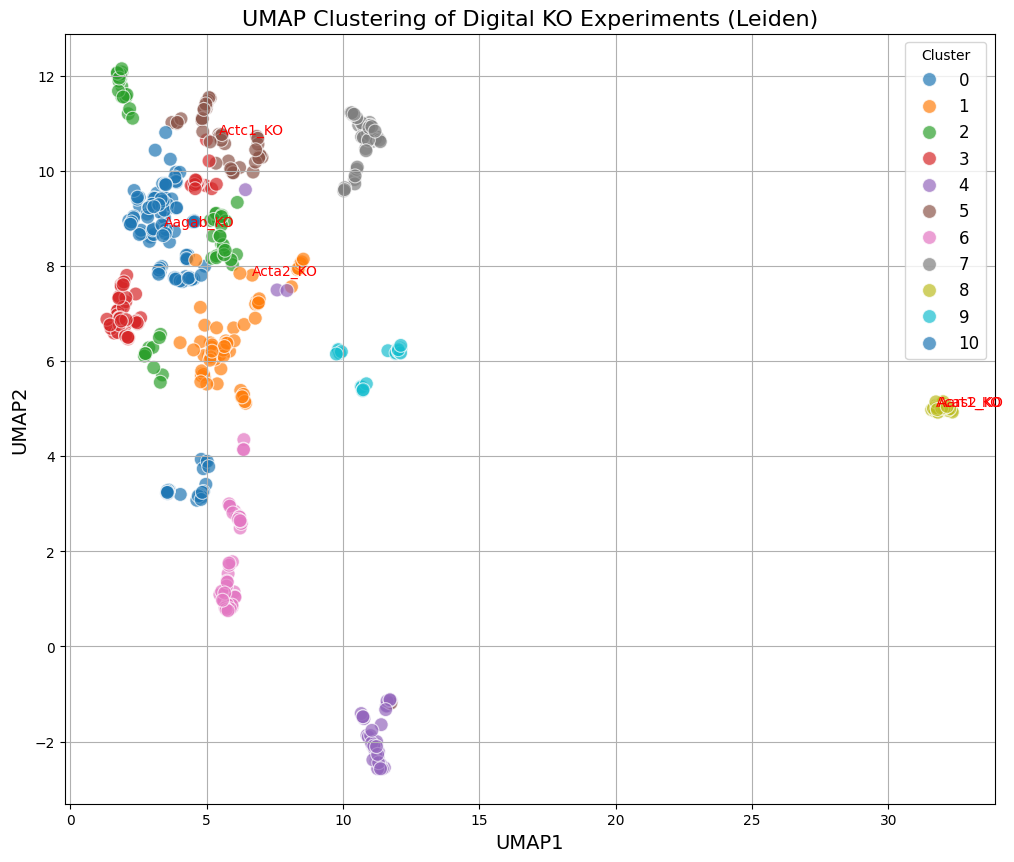

In [ ]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Standardize the data before UMAP clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ko_table)

# Perform UMAP dimensionality reduction
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_data)

# Add UMAP results to a dataframe
umap_df = pd.DataFrame(
    umap_result,
    columns=["UMAP1", "UMAP2"],
    index=ko_table.index
)

# Perform graph-based clustering (Leiden)
adata = sc.AnnData(X=scaled_data)
adata.obs_names = ko_table.index
sc.pp.neighbors(adata, n_neighbors=15, use_rep="X")
sc.tl.leiden(adata, resolution=0.6)
umap_df['Cluster'] = adata.obs['leiden'].astype(int)

# Plot the UMAP clustering
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="Cluster",
    palette="tab10",
    data=umap_df.reset_index(),
    s=100,
    alpha=0.7
)

# Highlight specific KO experiments
for ko in highlighted_ko:
    if ko in umap_df.index:
        plt.text(
            umap_df.loc[ko, "UMAP1"],
            umap_df.loc[ko, "UMAP2"],
            ko,
            fontsize=10,
            color='red'
        )

plt.title("UMAP Clustering of Digital KO Experiments (Leiden)", fontsize=16)
plt.xlabel("UMAP1", fontsize=14)
plt.ylabel("UMAP2", fontsize=14)
plt.legend(title="Cluster", fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Extract KO cluster assignments
ko_cluster_assignments = umap_df['Cluster']

# Group KOs by their assigned cluster and display
for cluster in sorted(ko_cluster_assignments.unique()):
    print(f"Cluster {cluster}:")
    cluster_kos = ko_cluster_assignments[ko_cluster_assignments == cluster].index.tolist()
    print(", ".join(cluster_kos))
    print("-" * 50)

Cluster 0:
Aagab_KO, Adamts18_KO, Aff3_KO, Arhgap1_KO, Arx_KO, Barhl2_KO, Bex1_KO, Bicc1_KO, Cenpb_KO, Cnn2_KO, Cntnap2_KO, Col11a1_KO, Col25a1_KO, Col26a1_KO, Col9a1_KO, Cpe_KO, Cpxm1_KO, Crlf1_KO, Cxcl12_KO, Dmrta2_KO, Dnajc1_KO, Ebf1_KO, Efnb1_KO, Eif2b5_KO, Elk3_KO, Emx2_KO, Enpp2_KO, Ezr_KO, Fbn2_KO, Fem1b_KO, Fkbp2_KO, Foxg1_KO, Foxp1_KO, Foxp2_KO, Gldc_KO, Hspa4l_KO, Ildr2_KO, Ina_KO, Irs4_KO, Irx2_KO, Islr2_KO, Itga6_KO, Kdm6b_KO, Klhdc10_KO, Lgals1_KO, Lgr4_KO, Lhx2_KO, Limch1_KO, Lix1_KO, Lrig3_KO, March7_KO, Mpped1_KO, Mpped2_KO, Myl9_KO, Ncaph_KO, Nectin3_KO, Nefl_KO, Nefm_KO, Nhlh2_KO, Nsg2_KO, Nup133_KO, Olig2_KO, Onecut2_KO, Otx2_KO, Pak3_KO, Pax1_KO, Pax9_KO, Pcdh19_KO, Plcd1_KO, Plod2_KO, Prmt5_KO, Ptprz1_KO, Rfc2_KO, Rpl13-ps6_KO, Rspo1_KO, Sfrp1_KO, Six3_KO, Slc25a39_KO, Smc2_KO, Sox5_KO, Sparcl1_KO, Sqle_KO, Srpk2_KO, Stx16_KO, Sulf1_KO, Synpo_KO, Tbx1_KO, Tle4_KO, Ubfd1_KO, Ubr2_KO, Wnt8b_KO, Ylpm1_KO, Zc3h13_KO, Zdbf2_KO, Zic3_KO
----------------------------------

Performing enrichment analysis for each cluster...
🔹 Analyzing Cluster 0 with 95 genes...
Top Enrichment for Cluster 0:
                   Gene_set                                               Term  \
0  WikiPathways_2024_Mouse                Neural Crest Differentiation WP2074   
1  WikiPathways_2024_Mouse  Dravet Syndrome Scn1a A1783V Point Mutation Mo...   
2  WikiPathways_2024_Mouse     Mechanisms Associated With Pluripotency WP1763   
3  WikiPathways_2024_Mouse                                Focal Adhesion WP85   
4  WikiPathways_2024_Mouse                     Cholesterol Biosynthesis WP103   

  Overlap   P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0    3/99  0.011723          0.292816            0                     0   
1    2/72  0.046041          0.292816            0                     0   
2   4/290  0.049495          0.292816            0                     0   
3   3/185  0.058137          0.292816            0                     0   
4    1/15  0

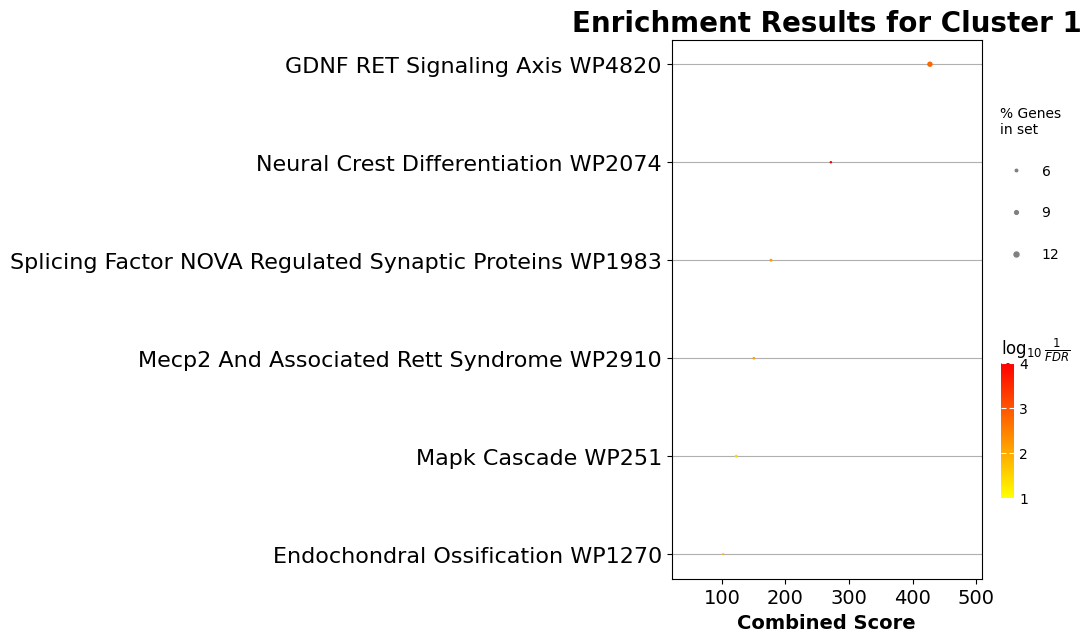

🔹 Analyzing Cluster 2 with 61 genes...
Top Enrichment for Cluster 2:
                   Gene_set                                          Term  \
0  WikiPathways_2024_Mouse                   Wnt Signaling Pathway WP539   
1  WikiPathways_2024_Mouse              TGF Beta Signaling Pathway WP113   
2  WikiPathways_2024_Mouse                   Histone Modifications WP300   
3  WikiPathways_2024_Mouse  Wnt Signaling Pathway And Pluripotency WP723   
4  WikiPathways_2024_Mouse              Hedgehog Signaling Pathway WP116   

  Overlap   P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   3/108  0.004391          0.127326            0                     0   
1    2/52  0.011001          0.146533            0                     0   
2     1/5  0.015159          0.146533            0                     0   
3    2/97  0.035403          0.256671            0                     0   
4    1/22  0.065027          0.257016            0                     0   

   Odds Ratio  C

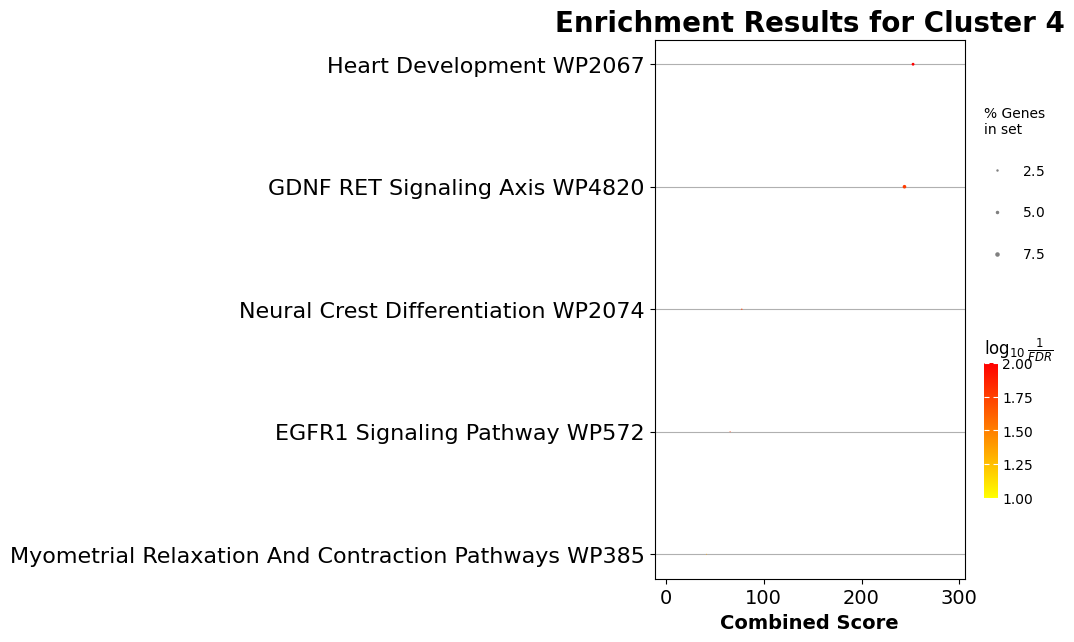

🔹 Analyzing Cluster 5 with 49 genes...
Top Enrichment for Cluster 5:
                   Gene_set                                               Term  \
0  WikiPathways_2024_Mouse                                Focal Adhesion WP85   
1  WikiPathways_2024_Mouse                Integrin Mediated Cell Adhesion WP6   
2  WikiPathways_2024_Mouse             Regulation Of Actin Cytoskeleton WP523   
3  WikiPathways_2024_Mouse                          EBV LMP1 Signaling WP1243   
4  WikiPathways_2024_Mouse  Dysregulated miRNA Targeting In Insulin PI3K A...   

  Overlap       P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   7/185  3.199639e-07          0.000016            0                     0   
1   4/100  1.048824e-04          0.002622            0                     0   
2   4/150  4.954182e-04          0.008257            0                     0   
3    2/21  1.198639e-03          0.014983            0                     0   
4    2/26  1.840602e-03          0.018406  

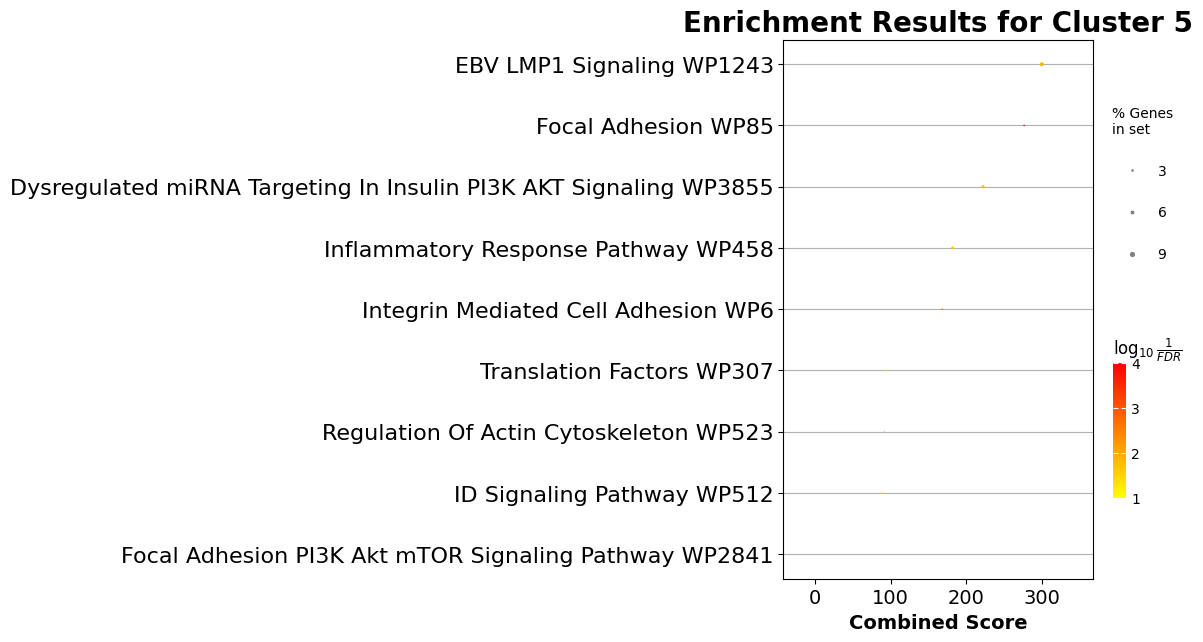

🔹 Analyzing Cluster 6 with 46 genes...
Top Enrichment for Cluster 6:
                   Gene_set                                          Term  \
0  WikiPathways_2024_Mouse                     Retinol Metabolism WP1259   
1  WikiPathways_2024_Mouse  Wnt Signaling Pathway And Pluripotency WP723   
2  WikiPathways_2024_Mouse                   Wnt Signaling Pathway WP539   
3  WikiPathways_2024_Mouse        Wnt Signaling In Kidney Disease WP3857   
4  WikiPathways_2024_Mouse                           Wnt Signaling WP403   

  Overlap   P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0    3/39  0.000098          0.002455            0                     0   
1    3/97  0.001443          0.016362            0                     0   
2   3/108  0.001963          0.016362            0                     0   
3    2/43  0.004401          0.027506            0                     0   
4    2/60  0.008416          0.042078            0                     0   

   Odds Ratio  C

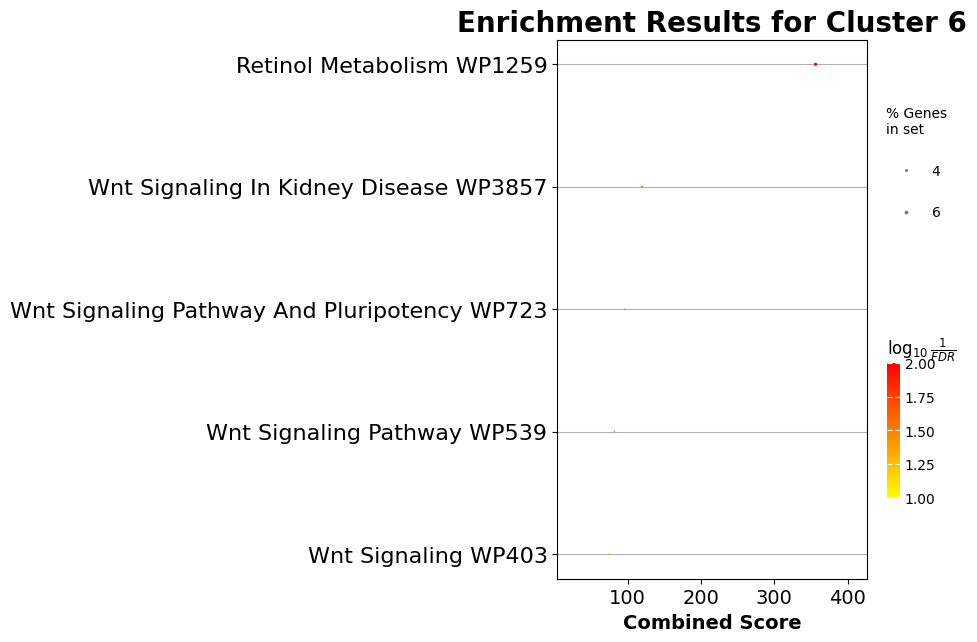

🔹 Analyzing Cluster 7 with 42 genes...
Top Enrichment for Cluster 7:
                   Gene_set                                               Term  \
0  WikiPathways_2024_Mouse  Focal Adhesion PI3K Akt mTOR Signaling Pathway...   
1  WikiPathways_2024_Mouse                                Focal Adhesion WP85   
2  WikiPathways_2024_Mouse                           Heart Development WP2067   
3  WikiPathways_2024_Mouse                               Lung Fibrosis WP3632   
4  WikiPathways_2024_Mouse                Integrin Mediated Cell Adhesion WP6   

  Overlap   P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   5/322  0.000547          0.010548            0                     0   
1   4/185  0.000603          0.010548            0                     0   
2    2/44  0.003851          0.044932            0                     0   
3    2/60  0.007055          0.061728            0                     0   
4   2/100  0.018714          0.130998            0             

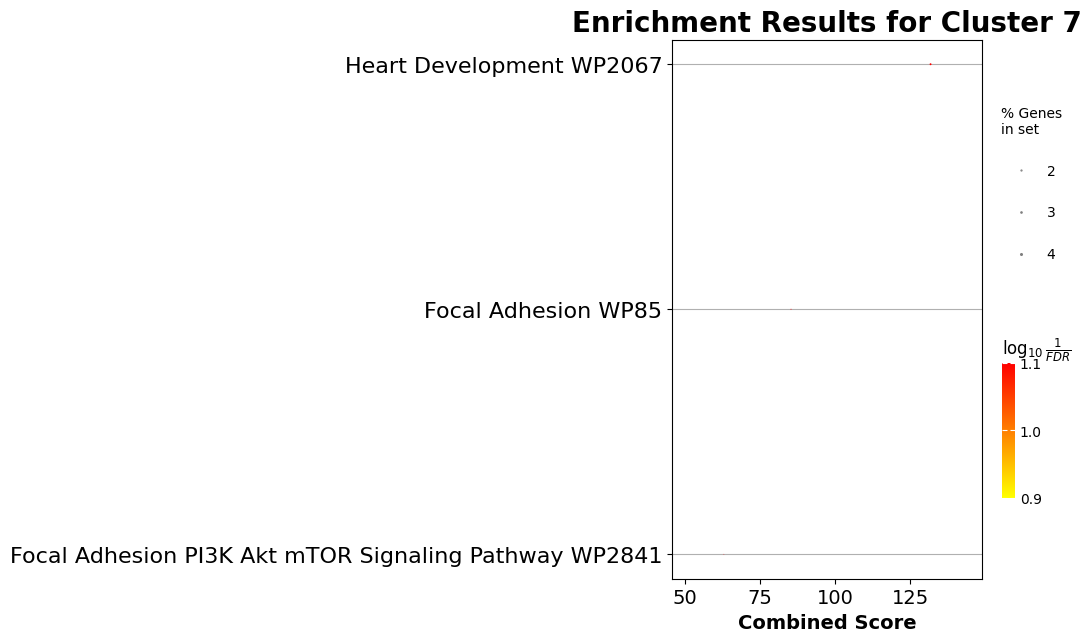

🔹 Analyzing Cluster 8 with 32 genes...
Top Enrichment for Cluster 8:
                   Gene_set                                               Term  \
0  WikiPathways_2024_Mouse                 G Protein Signaling Pathways WP232   
1  WikiPathways_2024_Mouse                   Fatty Acid Beta Oxidation WP1269   
2  WikiPathways_2024_Mouse   Synthesis And Degradation Of Ketone Bodies WP543   
3  WikiPathways_2024_Mouse                       Leptin And Adiponectin WP683   
4  WikiPathways_2024_Mouse  Mitochondrial Long Chain Fatty Acid Beta Oxida...   

  Overlap   P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0    3/89  0.000385          0.010390            0                     0   
1    2/34  0.001348          0.018192            0                     0   
2     1/5  0.007975          0.071776            0                     0   
3    1/10  0.015889          0.107249            0                     0   
4    1/16  0.025304          0.134907            0             

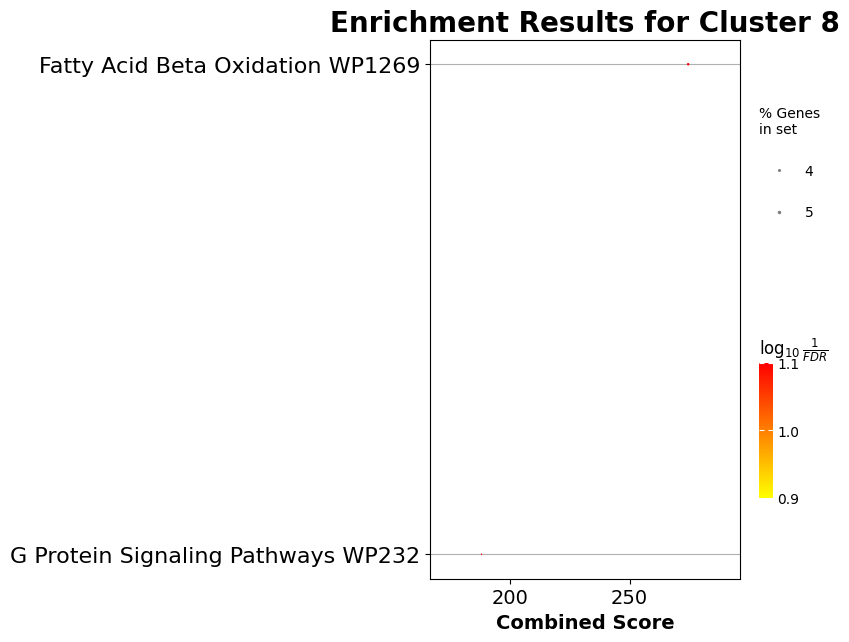

🔹 Analyzing Cluster 9 with 30 genes...
Top Enrichment for Cluster 9:
                   Gene_set                                               Term  \
0  WikiPathways_2024_Mouse                                Focal Adhesion WP85   
1  WikiPathways_2024_Mouse           Signal Transduction Of S1P Receptor WP57   
2  WikiPathways_2024_Mouse                Inflammatory Response Pathway WP458   
3  WikiPathways_2024_Mouse  Primary Focal Segmental Glomerulosclerosis FSG...   
4  WikiPathways_2024_Mouse  Dravet Syndrome Scn1a A1783V Point Mutation Mo...   

  Overlap   P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   2/185  0.031244          0.234912            0                     0   
1    1/22  0.032502          0.234912            0                     0   
2    1/30  0.044066          0.234912            0                     0   
3    1/71  0.101265          0.234912            0                     0   
4    1/72  0.102618          0.234912            0             

In [ ]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

# Assuming `ko_cluster_assignments` is a Pandas Series with KO names as index and cluster numbers as values
# Remove "_KO" suffix from gene names
ko_cluster_assignments = umap_df['Cluster']
ko_cluster_assignments.index = [gene.replace('_KO', '') for gene in ko_cluster_assignments.index]

# Group genes by cluster
clustered_genes = {
    cluster: ko_cluster_assignments[ko_cluster_assignments == cluster].index.tolist()
    for cluster in sorted(ko_cluster_assignments.unique())
}

# Perform enrichment analysis for each cluster using Enrichr API
enrichment_results = {}

print("Performing enrichment analysis for each cluster...")
for cluster_name, genes in clustered_genes.items():
    print(f"🔹 Analyzing Cluster {cluster_name} with {len(genes)} genes...")

    try:
        # Run Enrichr API for the current cluster
        enr = gp.enrichr(
            gene_list=genes,  # List of genes for the current cluster
            gene_sets='WikiPathways_2024_Mouse',  # Specify gene set library
            organism='Mouse',  # Specify organism (e.g., Mouse, Human)
            outdir=None  # Set to None to avoid saving output files
        )

        # Store results
        enrichment_results[cluster_name] = enr.results

        # Print top results for the cluster
        if not enr.results.empty:
            print(f"Top Enrichment for Cluster {cluster_name}:\n", enr.results.head(), "\n")

            # Generate a dotplot for the current cluster's enrichment results
            print(f"Creating dotplot for Cluster {cluster_name}...")
            gp.dotplot(
                enr.results,  # Results dataframe
                figsize=(5, 7),  # Adjust the figure size
                title=f"Enrichment Results for Cluster {cluster_name}",
                cmap=plt.cm.autumn_r  # Customize the color map
            )
            plt.show()
        else:
            print(f"No significant enrichment found for Cluster {cluster_name}.\n")

    except Exception as e:
        print(f"⚠️ Enrichment failed for Cluster {cluster_name}: {e}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def custom_dotplot(enrichment_df, cluster_name, top_n=10):
    """
    Generates a custom dotplot for enrichment results.

    Parameters:
    - enrichment_df (pd.DataFrame): Enrichment results from gseapy.
    - cluster_name (str): Name of the cluster being analyzed.
    - top_n (int): Number of top pathways to display.
    """
    # Ensure data is not empty
    if enrichment_df.empty:
        print(f"⚠️ No enrichment data for {cluster_name}. Skipping plot.")
        return

    # Convert "Adjusted P-value" to numeric (some libraries may return it as string)
    enrichment_df["Adjusted P-value"] = pd.to_numeric(enrichment_df["Adjusted P-value"], errors="coerce")

    # Avoid log issues with zero or NaN values
    enrichment_df = enrichment_df.dropna(subset=["Adjusted P-value"])
    enrichment_df = enrichment_df[enrichment_df["Adjusted P-value"] > 0]

    # Compute -log10(Adjusted P-value)
    enrichment_df["-log10(Adjusted P-value)"] = -np.log10(enrichment_df["Adjusted P-value"])

    # Select top N enriched pathways
    enrichment_df = enrichment_df.sort_values(by="Adjusted P-value", ascending=True).head(top_n)

    # Plot
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(
        data=enrichment_df,
        x="-log10(Adjusted P-value)",  # Corrected column name
        y="Term",
        size="Overlap",  # Number of genes overlapping with pathway
        hue="Adjusted P-value",  # Color based on significance
        palette="coolwarm",
        sizes=(50, 300),  # Size scaling
        edgecolor="black",
        linewidth=0.5
    )

    # Customize plot
    plt.xlabel("-log10 Adjusted P-value", fontsize=12)
    plt.ylabel("Enriched Pathways", fontsize=12)
    plt.title(f"Enrichment Dotplot for Cluster {cluster_name}", fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis so most significant pathways are on top
    plt.legend(title="Gene Overlap", loc="lower right", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.5)

    # Show plot
    plt.show()


Creating custom dotplot for 0...


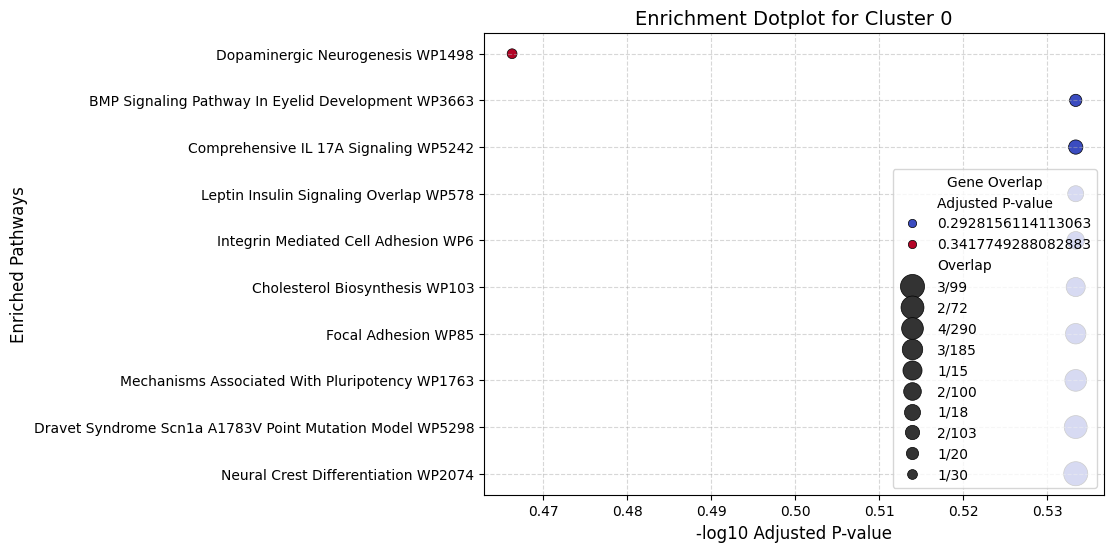

Creating custom dotplot for 1...


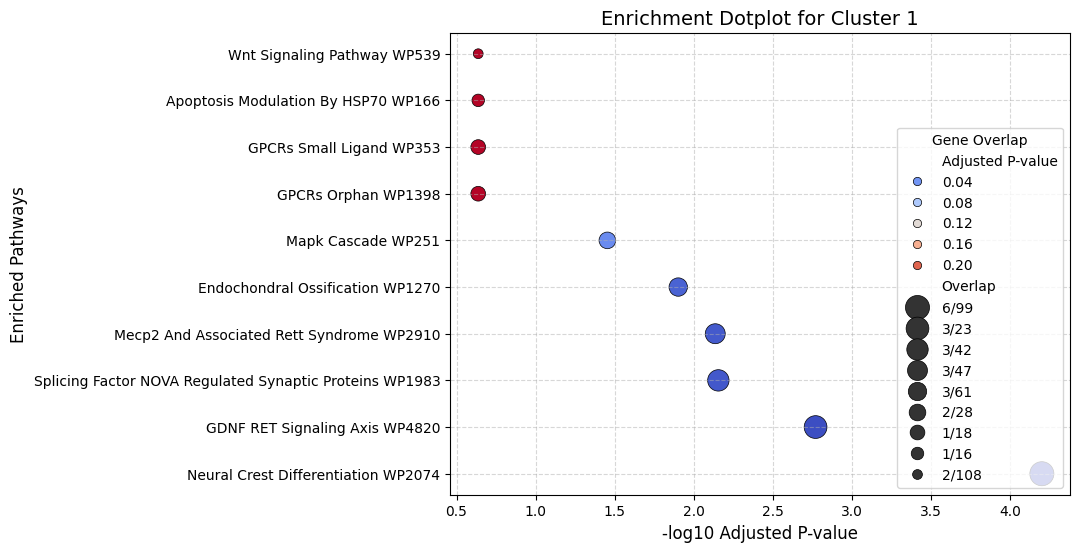

Creating custom dotplot for 2...


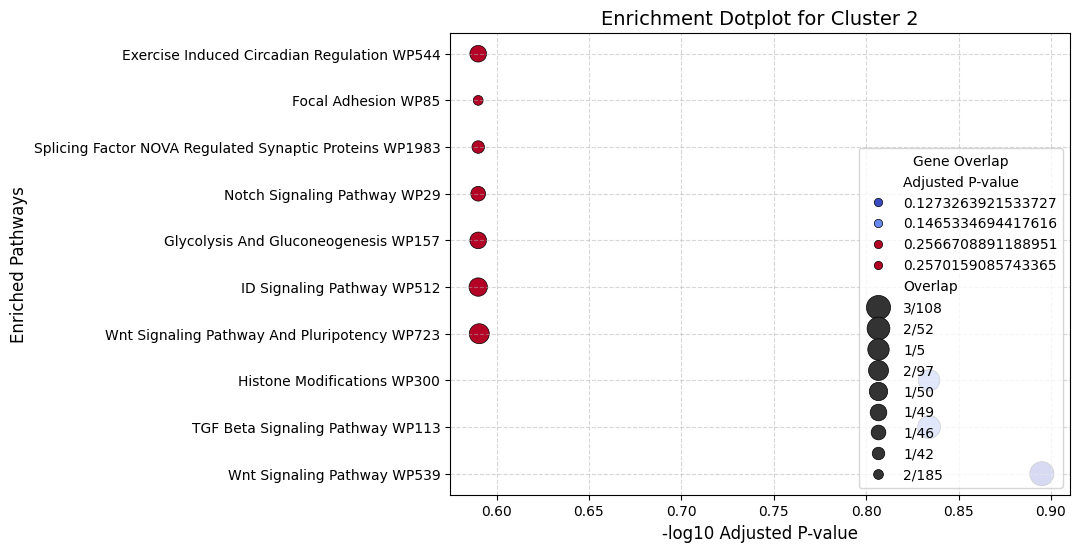

Creating custom dotplot for 3...


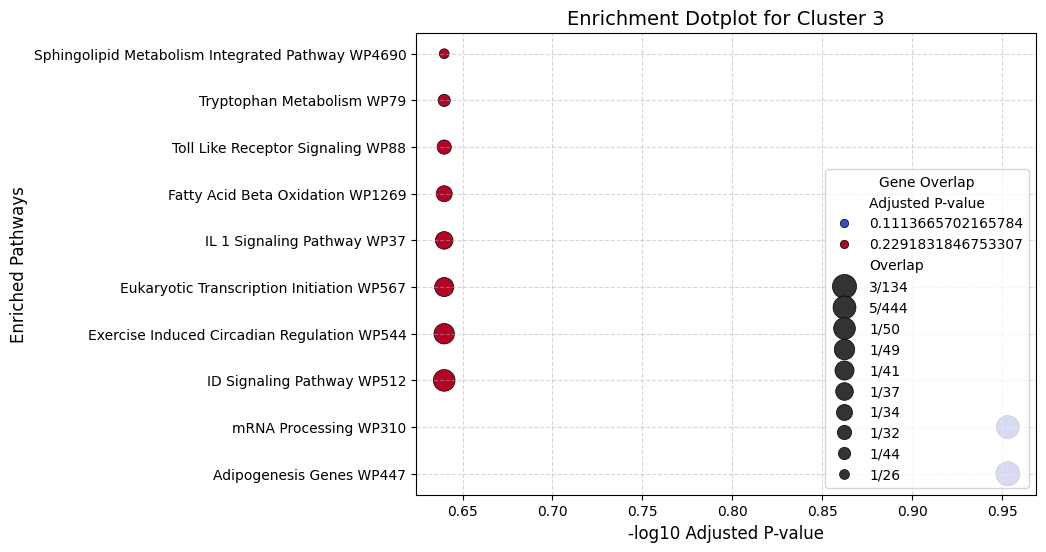

Creating custom dotplot for 4...


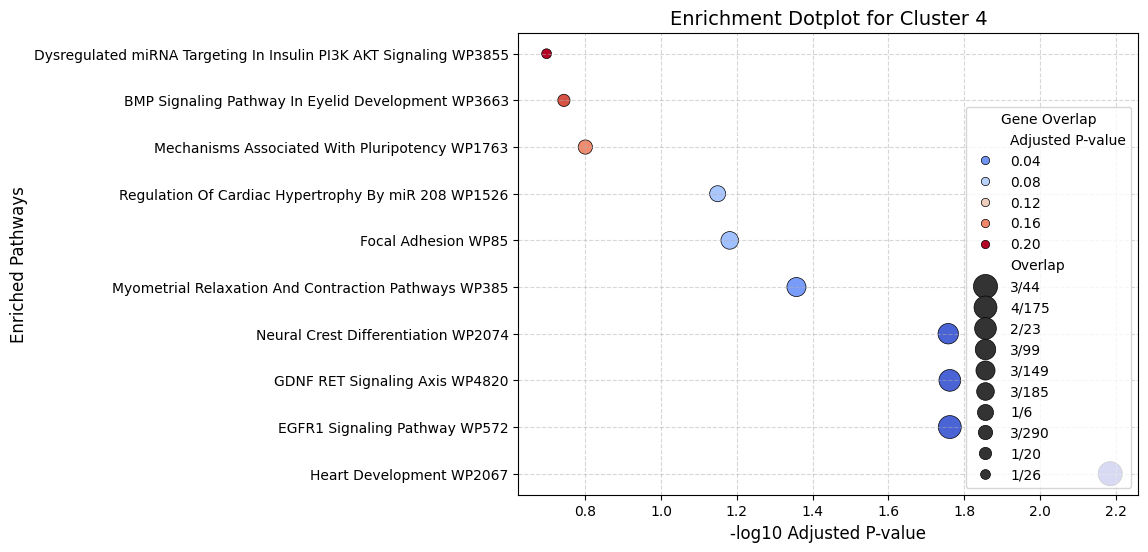

Creating custom dotplot for 5...


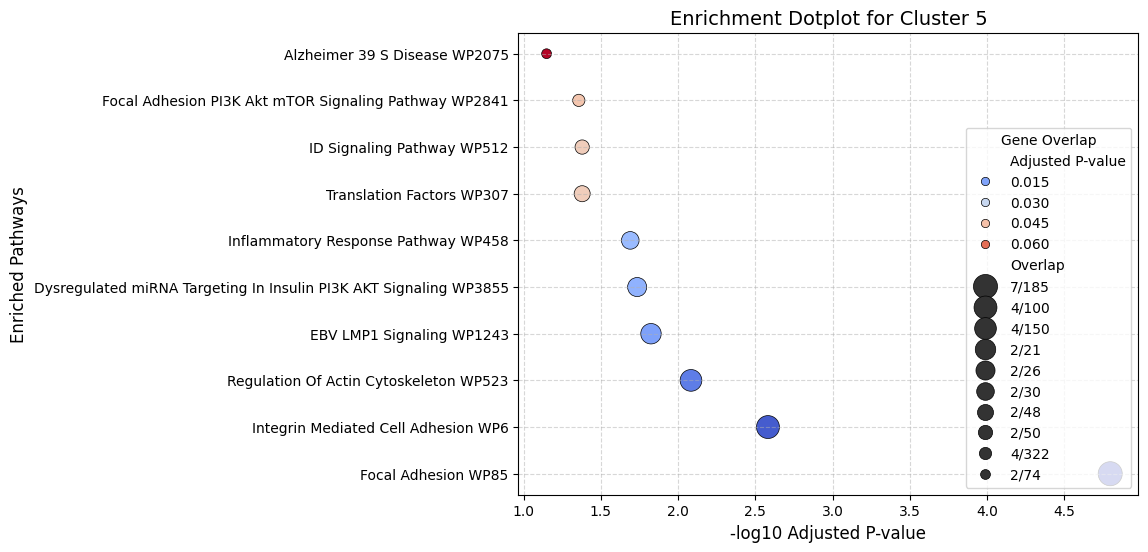

Creating custom dotplot for 6...


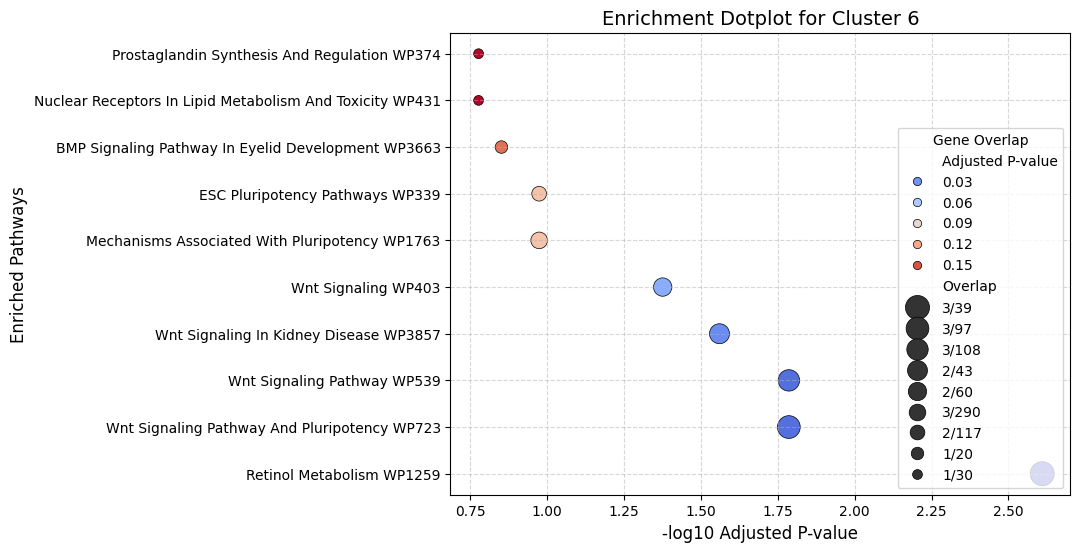

Creating custom dotplot for 7...


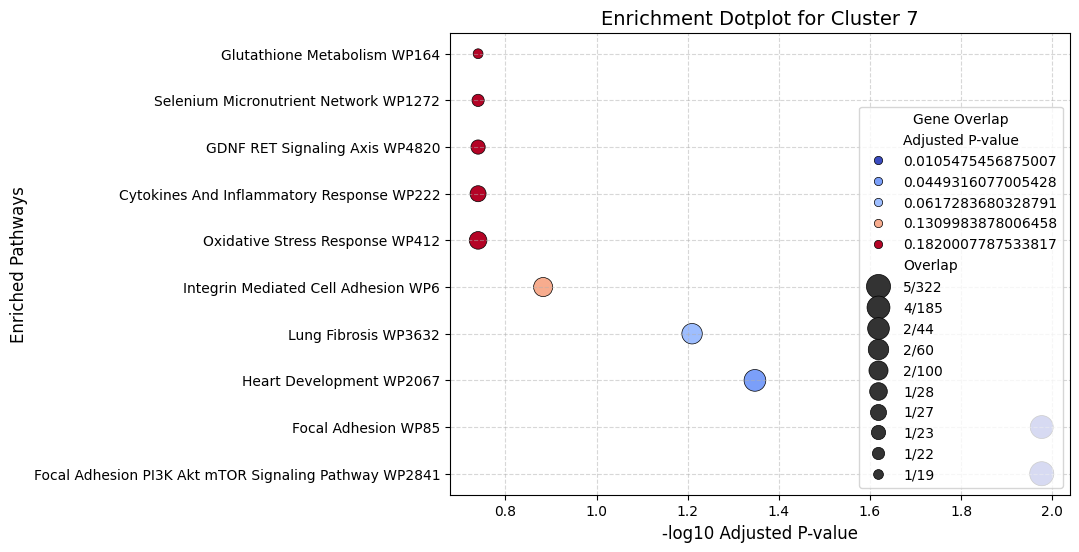

Creating custom dotplot for 8...


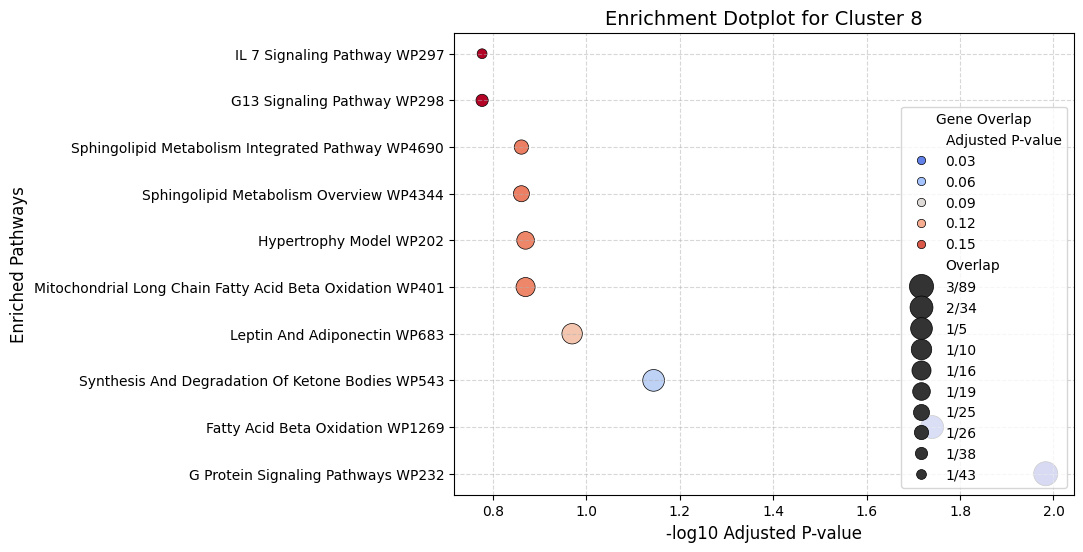

Creating custom dotplot for 9...


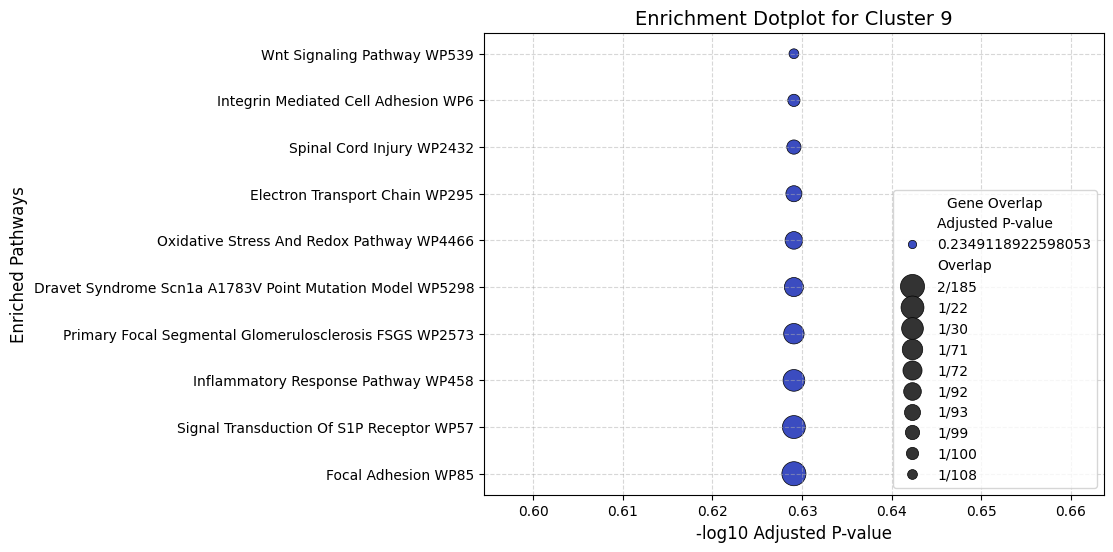

Creating custom dotplot for 10...


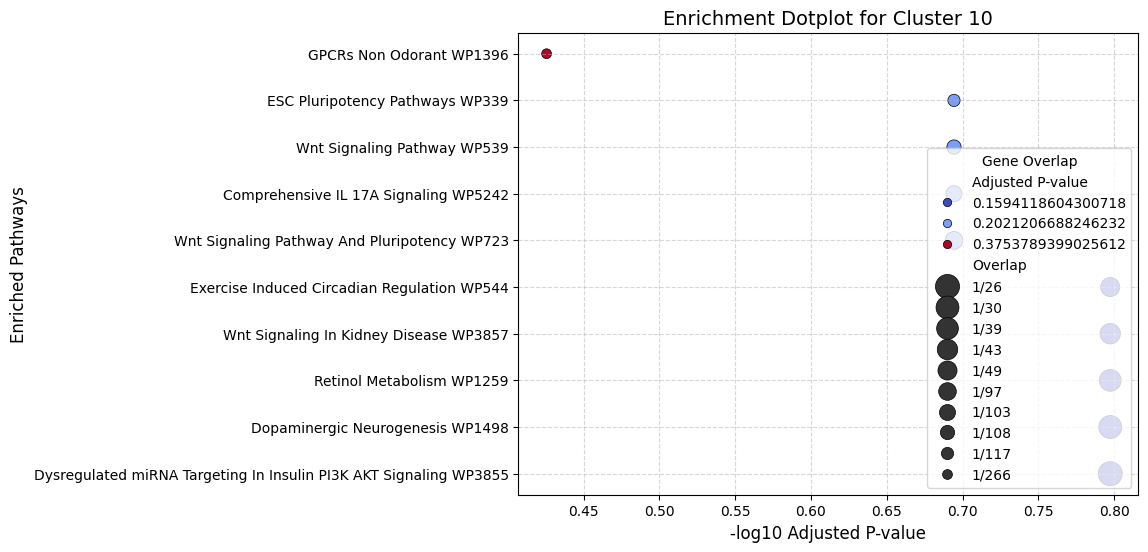

In [ ]:
for cluster_name, results in enrichment_results.items():
    print(f"Creating custom dotplot for {cluster_name}...")
    if results is not None and not results.empty:
        custom_dotplot(results, cluster_name, top_n=10)
    else:
        print(f"⚠️ No enrichment results to plot for {cluster_name}.")

In [ ]:
gene_name = "Six2"
if gene_name in ko_cluster_assignments.index:
    cluster_number = ko_cluster_assignments[gene_name]
    print(f"✅ {gene_name} is in Cluster {cluster_number}")
else:
    print(f"⚠️ {gene_name} not found in the dataset.")

✅ Six2 is in Cluster 7


In [ ]:
cluster_number = 7
genes_in_cluster = ko_cluster_assignments[ko_cluster_assignments == cluster_number].index.tolist()

print(f"✅ Cluster {cluster_number} contains {len(genes_in_cluster)} genes:")
print(", ".join(genes_in_cluster))

✅ Cluster 7 contains 42 genes:
Adamts1, Alx1, Atp1b1, Capn6, Ccnt2, Creb3l2, Crym, Dsp, Dstn, Epb41l3, Eya1, Fabp7, Fbln2, Frem2, Frmd6, Gpx3, Hmcn1, Igsf3, Il11ra1, Itga4, Itm2a, Lama4, Meis1, Mical2, Nfatc4, Nr2e1, Nrk, Nudt4, Pdgfa, Rest, Sh3bgr, Six1, Six2, Six4, Smyd1, Spen, Tagln, Tnc, Tnni3, Tpm1, Vcan, Zic1


In [ ]:
# Download the DBiT-seq dataset suitable for this workshop
!gdown  1D3AIjshsAiIOktmFrvMgqKO1UKiQSPbu

# Assemble adata object for single-cell analysis
adata = sc.read("DBiTseq_UnitedNet.h5ad")
adata

Downloading...
From: https://drive.google.com/uc?id=1D3AIjshsAiIOktmFrvMgqKO1UKiQSPbu
To: /content/DBiTseq_UnitedNet.h5ad
100% 2.36M/2.36M [00:00<00:00, 155MB/s]


AnnData object with n_obs × n_vars = 936 × 568
    obs: 'id', 'array_row', 'array_col', 'cell_type', 'batch', 'imagecol', 'imagerow', 'label', 'sample'
    var: 'gene_ids-0', 'gene_ids-1'
    obsm: 'spatial'

In [ ]:
adata

AnnData object with n_obs × n_vars = 936 × 568
    obs: 'id', 'array_row', 'array_col', 'cell_type', 'batch', 'imagecol', 'imagerow', 'label', 'sample'
    var: 'gene_ids-0', 'gene_ids-1'
    obsm: 'spatial'

<ipython-input-19-7223709f5084>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


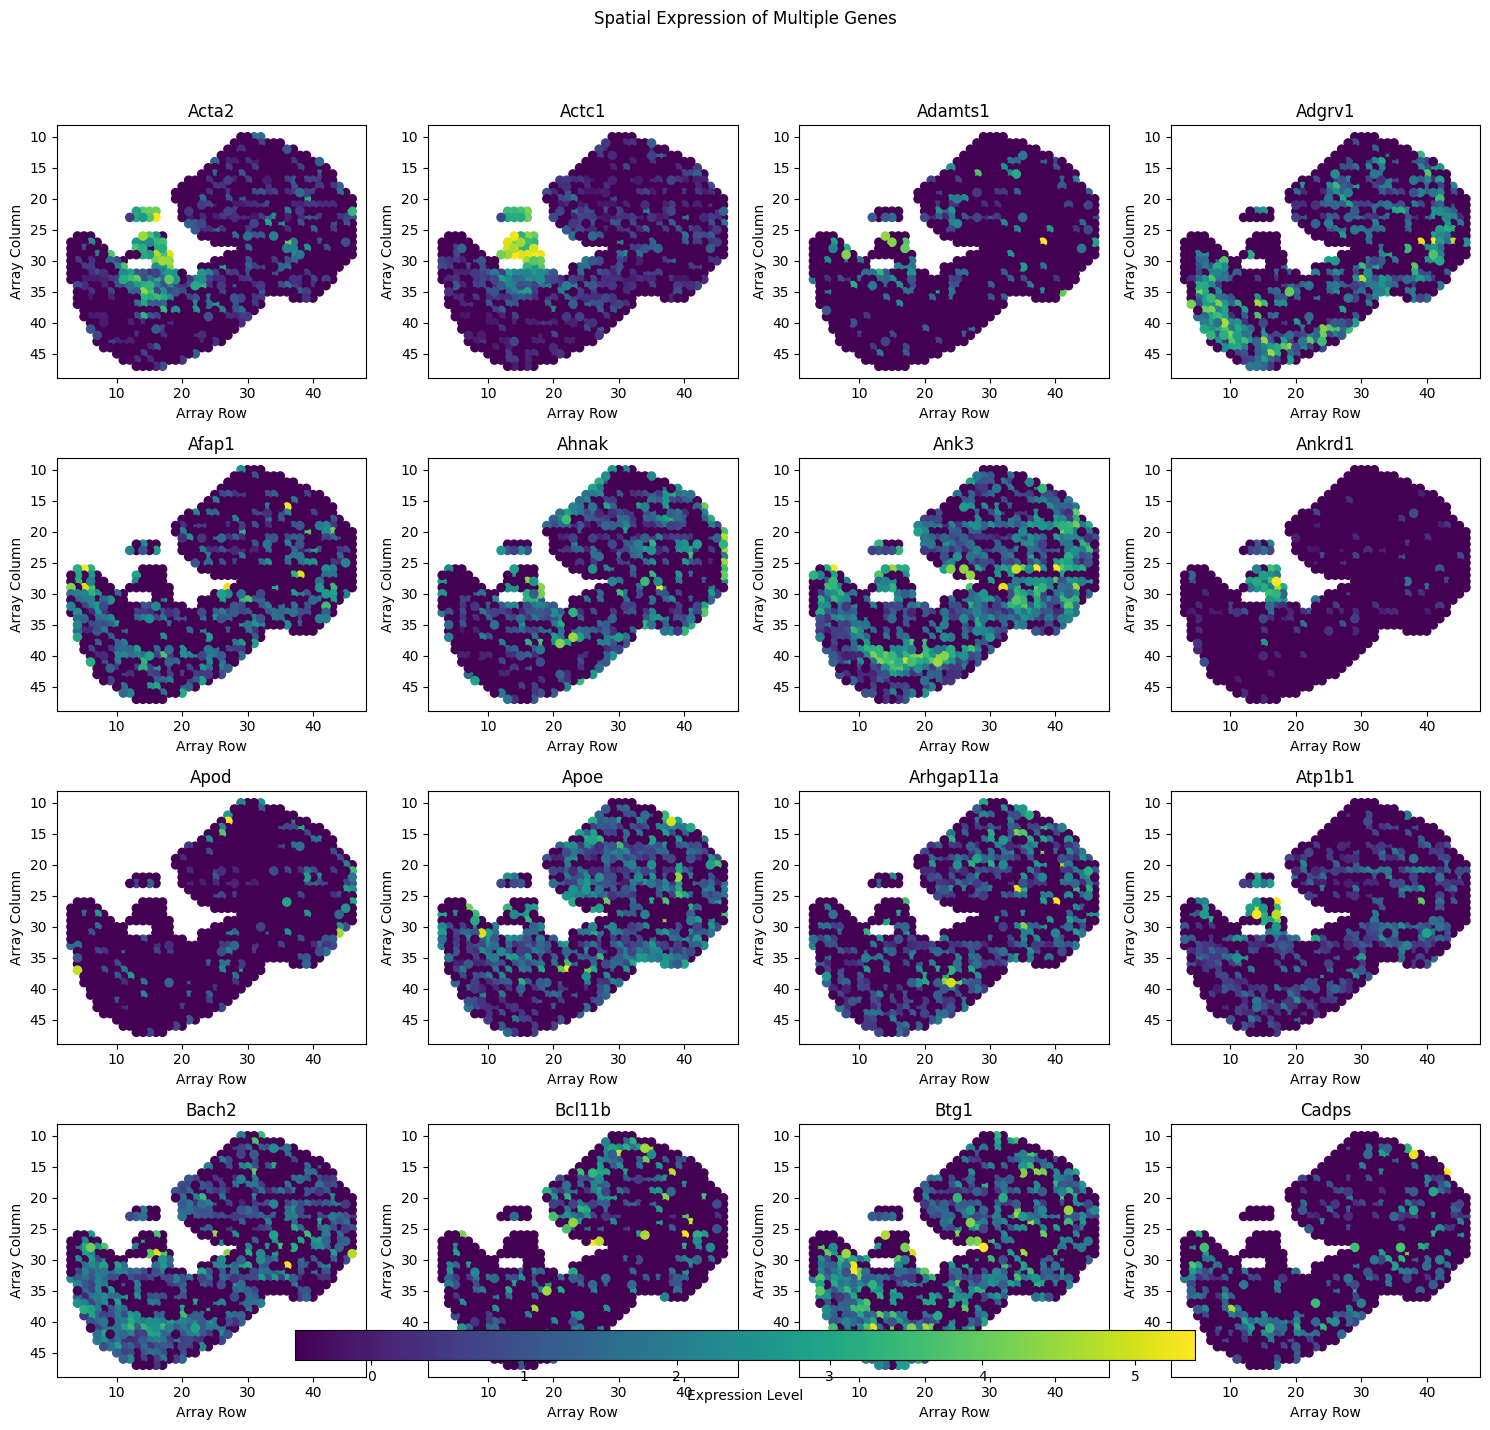

In [ ]:
def plot_multiple_genes(adata, gene_list):
    # Check if all genes are present in the dataset
    missing_genes = [gene for gene in gene_list if gene not in adata.var_names]
    if missing_genes:
        print(f"The following genes were not found in the dataset: {', '.join(missing_genes)}")
        gene_list = [gene for gene in gene_list if gene in adata.var_names]

    # Calculate grid size
    n_genes = len(gene_list)
    grid_size = int(np.ceil(np.sqrt(n_genes)))

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    axs = axs.flatten()

    for i, gene in enumerate(gene_list):
        gene_expression = adata[:, gene].X.toarray().flatten()
        sc = axs[i].scatter(adata.obs['array_row'], adata.obs['array_col'],
                            c=gene_expression, cmap='viridis', s=35)
        axs[i].set_title(f'{gene}')
        axs[i].invert_yaxis()
        axs[i].set_xlabel('Array Row')
        axs[i].set_ylabel('Array Column')

    # Remove empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Move the color bar slightly lower
    cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.02])  # Adjust coordinates here
    plt.colorbar(sc, cax=cbar_ax, orientation='horizontal', label='Expression Level')

    plt.suptitle('Spatial Expression of Multiple Genes')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Updated gene list
gene_list = [
    "Acta2", "Actc1", "Adamts1", "Adgrv1", "Afap1",
    "Ahnak", "Ank3", "Ankrd1", "Apod", "Apoe",
    "Arhgap11a", "Atp1b1", "Bach2", "Bcl11b", "Btg1", "Cadps"
]
plot_multiple_genes(adata, gene_list)

<ipython-input-20-4f66d24f8de9>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


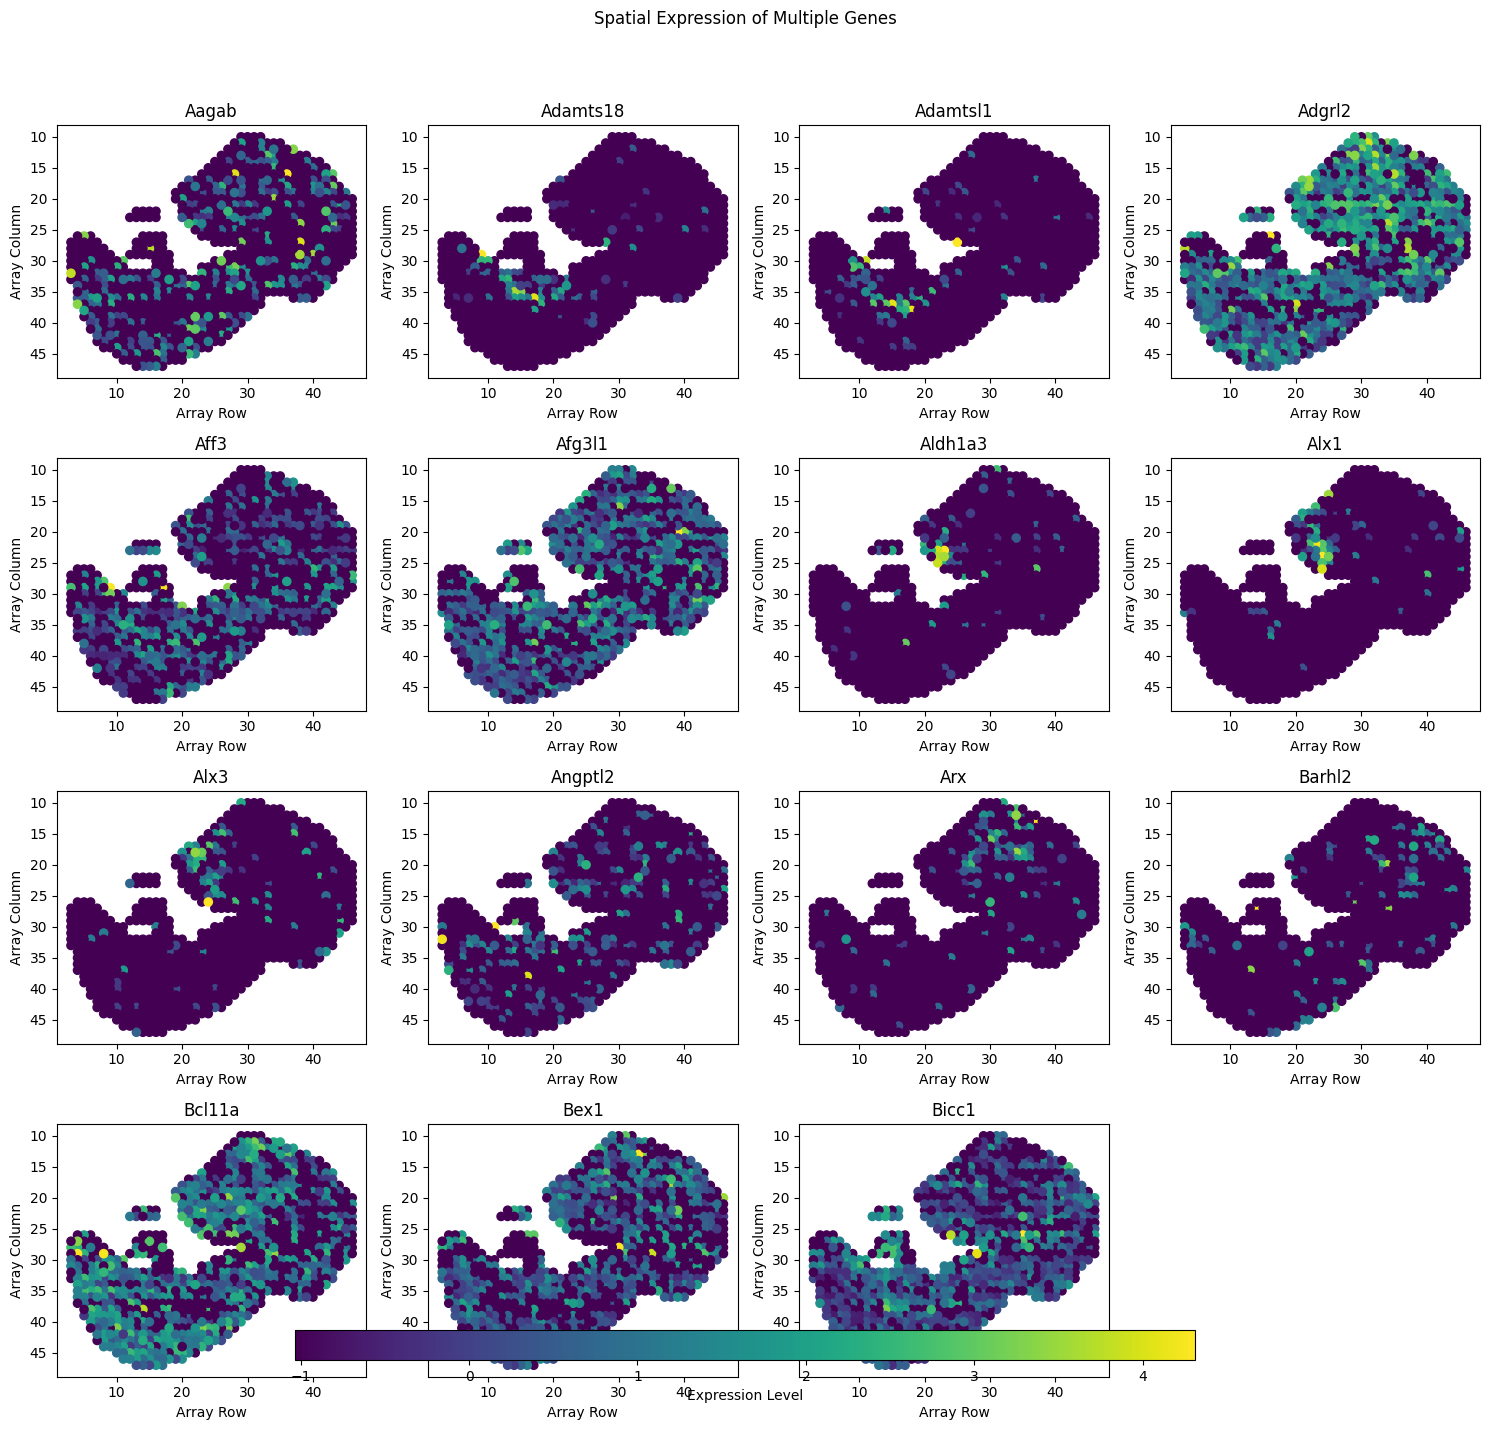

In [ ]:
def plot_multiple_genes(adata, gene_list):
    # Check if all genes are present in the dataset
    missing_genes = [gene for gene in gene_list if gene not in adata.var_names]
    if missing_genes:
        print(f"The following genes were not found in the dataset: {', '.join(missing_genes)}")
        gene_list = [gene for gene in gene_list if gene in adata.var_names]

    # Calculate grid size
    n_genes = len(gene_list)
    grid_size = int(np.ceil(np.sqrt(n_genes)))

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    axs = axs.flatten()

    for i, gene in enumerate(gene_list):
        gene_expression = adata[:, gene].X.toarray().flatten()
        sc = axs[i].scatter(adata.obs['array_row'], adata.obs['array_col'],
                            c=gene_expression, cmap='viridis', s=35)
        axs[i].set_title(f'{gene}')
        axs[i].invert_yaxis()
        axs[i].set_xlabel('Array Row')
        axs[i].set_ylabel('Array Column')

    # Remove empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Move the color bar slightly lower
    cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.02])  # Adjust coordinates here
    plt.colorbar(sc, cax=cbar_ax, orientation='horizontal', label='Expression Level')

    plt.suptitle('Spatial Expression of Multiple Genes')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Updated gene list
gene_list = [
      "Aagab", "Adamts18", "Adamtsl1", "Adgrl2", "Aff3",
    "Afg3l1", "Aldh1a3", "Alx1", "Alx3", "Angptl2",
    "Arx", "Barhl2", "Bcl11a", "Bex1", "Bicc1"
]
plot_multiple_genes(adata, gene_list)